In [1]:
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
from textblob import TextBlob
from collections import defaultdict
from nltk.tokenize import word_tokenize
from nltk import ngrams
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [2]:
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
import nltk
nltk.download('wordnet')
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

unzip:  cannot find or open /usr/share/nltk_data/corpora/wordnet.zip, /usr/share/nltk_data/corpora/wordnet.zip.zip or /usr/share/nltk_data/corpora/wordnet.zip.ZIP.


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
df = pd.read_csv('/content/tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [7]:
#function for removing the punctuations
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [8]:
df['Review']= df['Review'].apply(lambda x:remove_punctuation(x))
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4 experience hotel monaco seatt...,3
3,unique great stay wonderful time hotel monaco ...,5
4,great stay great stay went seahawk game awesom...,5


In [9]:
df['Review']= df['Review'].apply(lambda x: x.lower())
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4 experience hotel monaco seatt...,3
3,unique great stay wonderful time hotel monaco ...,5
4,great stay great stay went seahawk game awesom...,5


In [10]:
df['Review']=df['Review'].astype(str)

In [11]:
def tokenize_review(review):
    tokens = word_tokenize(review)
    return tokens

In [12]:
df['tokens'] = df['Review'].apply(tokenize_review)
df.head()

,Review,Rating,tokens
0,nice hotel expensive parking got good deal sta...,4,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4 experience hotel monaco seatt...,3,"[nice, rooms, not, 4, experience, hotel, monac..."
3,unique great stay wonderful time hotel monaco ...,5,"[unique, great, stay, wonderful, time, hotel, ..."
4,great stay great stay went seahawk game awesom...,5,"[great, stay, great, stay, went, seahawk, game..."


In [14]:
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
nltk.download('stopwords')
def remove_stopwords(text_list):
    return [word for word in text_list if word.lower() not in stopwords]

df['tokens']= df['tokens'].apply(lambda x:remove_stopwords(x))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Review,Rating,tokens
0,nice hotel expensive parking got good deal sta...,4,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4 experience hotel monaco seatt...,3,"[nice, rooms, 4, experience, hotel, monaco, se..."
3,unique great stay wonderful time hotel monaco ...,5,"[unique, great, stay, wonderful, time, hotel, ..."
4,great stay great stay went seahawk game awesom...,5,"[great, stay, great, stay, went, seahawk, game..."


In [21]:
porter_stemmer = PorterStemmer()
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

In [22]:
df['stem']=df['tokens'].apply(lambda x: stemming(x))
df.head()

,Review,Rating,tokens,stem
0,nice hotel expensive parking got good deal sta...,4,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expens, park, got, good, deal, s..."
1,ok nothing special charge diamond member hilto...,2,"[ok, nothing, special, charge, diamond, member...","[ok, noth, special, charg, diamond, member, hi..."
2,nice rooms not 4 experience hotel monaco seatt...,3,"[nice, rooms, 4, experience, hotel, monaco, se...","[nice, room, 4, experi, hotel, monaco, seattl,..."
3,unique great stay wonderful time hotel monaco ...,5,"[unique, great, stay, wonderful, time, hotel, ...","[uniqu, great, stay, wonder, time, hotel, mona..."
4,great stay great stay went seahawk game awesom...,5,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game..."


In [23]:
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

In [24]:
df['lemmatize']=df['stem'].apply(lambda x:lemmatizer(x))
df.head()

,Review,Rating,tokens,stem,lemmatize
0,nice hotel expensive parking got good deal sta...,4,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expens, park, got, good, deal, s...","[nice, hotel, expens, park, got, good, deal, s..."
1,ok nothing special charge diamond member hilto...,2,"[ok, nothing, special, charge, diamond, member...","[ok, noth, special, charg, diamond, member, hi...","[ok, noth, special, charg, diamond, member, hi..."
2,nice rooms not 4 experience hotel monaco seatt...,3,"[nice, rooms, 4, experience, hotel, monaco, se...","[nice, room, 4, experi, hotel, monaco, seattl,...","[nice, room, 4, experi, hotel, monaco, seattl,..."
3,unique great stay wonderful time hotel monaco ...,5,"[unique, great, stay, wonderful, time, hotel, ...","[uniqu, great, stay, wonder, time, hotel, mona...","[uniqu, great, stay, wonder, time, hotel, mona..."
4,great stay great stay went seahawk game awesom...,5,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game..."


In [25]:
freq = {}
for i in df['lemmatize']:
    for j in i:
        if j not in freq:
            freq[j] = 1
        else:
            freq[j] += 1

In [26]:


list(freq.items())[:25]

[('nice', 13053),
 ('hotel', 52869),
 ('expens', 2015),
 ('park', 3195),
 ('got', 6185),
 ('good', 17109),
 ('deal', 1664),
 ('stay', 28240),
 ('anniversari', 413),
 ('arriv', 4854),
 ('late', 1584),
 ('even', 2100),
 ('took', 2942),
 ('advic', 513),
 ('previou', 737),
 ('review', 5296),
 ('valet', 514),
 ('check', 4966),
 ('quick', 897),
 ('easi', 2137),
 ('littl', 6243),
 ('disappoint', 2000),
 ('nonexist', 79),
 ('view', 5922),
 ('room', 46320)]

In [27]:
freq_df=pd.DataFrame(sorted(freq.items(),key=lambda x:x[1],reverse=True))

In [28]:
f1=freq_df[0][:10]
f2=freq_df[1][:10]

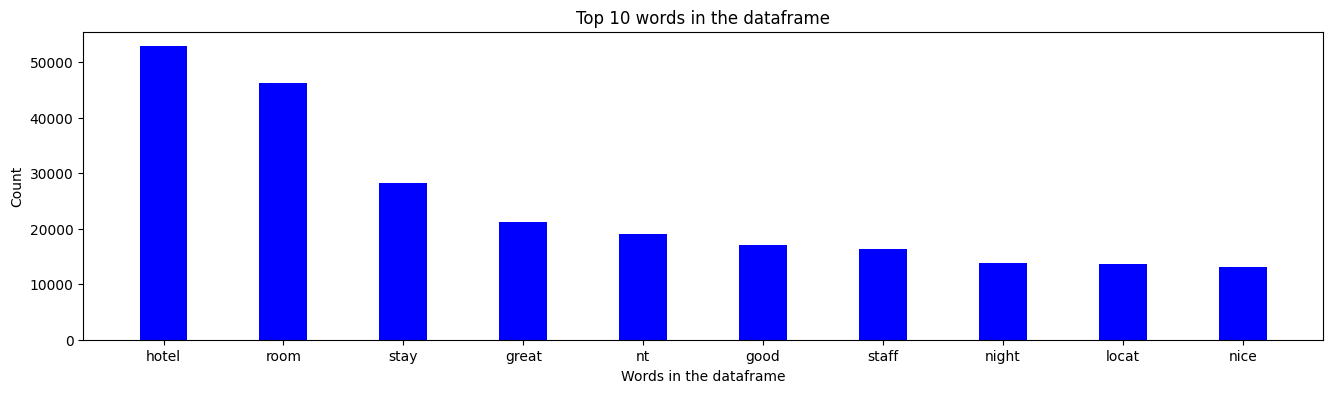

In [29]:
plt.figure(1,figsize=(16,4))
plt.bar(f1,f2,color ='blue',width = 0.4)
plt.xlabel("Words in the dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in the dataframe")
plt.savefig("wordfrequency.png")
plt.show()

In [30]:
def generate_N_grams(text,n=1):
  my_ngrams = ngrams(text.split(), n)
  return my_ngrams

In [31]:
ngram = defaultdict(int)
for text in df.Review:
  for word in generate_N_grams(text,2):
    i = word[0]+' '+word[1]
    ngram[i]+=1

In [32]:
ngram=pd.DataFrame(sorted(ngram.items(),key=lambda x:x[1],reverse=True))

In [33]:
d1=ngram[0][:10]
d2=ngram[1][:10]

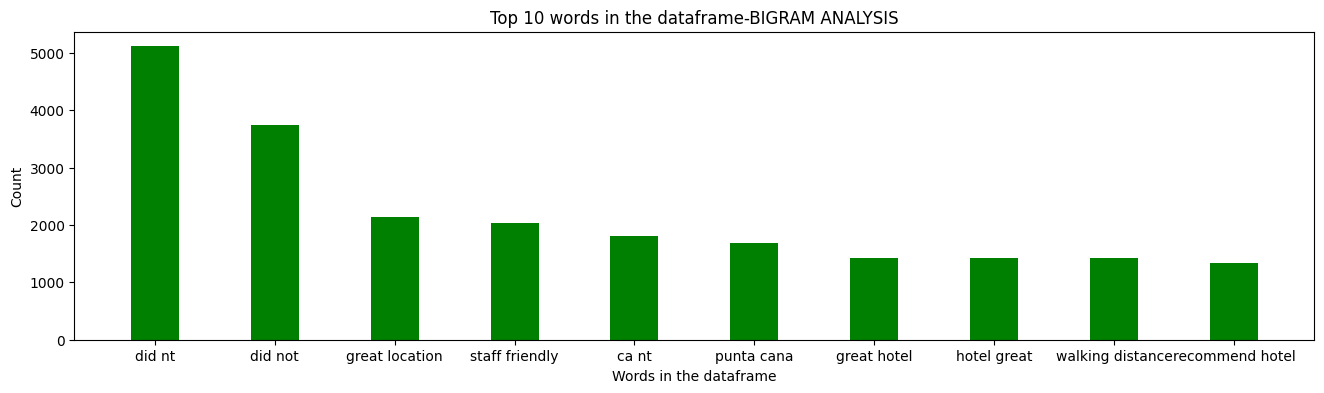

In [34]:
plt.figure(1,figsize=(16,4))
plt.bar(d1,d2,color ='green',width = 0.4)
plt.xlabel("Words in the dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in the dataframe-BIGRAM ANALYSIS")
plt.savefig("bigram_analysis.png")
plt.show()

In [35]:
#this function give a value from -1 to 1 based on whether the data is negative or neutral or positive.
def get_sentiment(review):
    blob = TextBlob(review)
    return blob.sentiment.polarity

In [36]:
df['sentiment'] = df['Review'].apply(get_sentiment)
df.head()

,Review,Rating,tokens,stem,lemmatize,sentiment
0,nice hotel expensive parking got good deal sta...,4,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expens, park, got, good, deal, s...","[nice, hotel, expens, park, got, good, deal, s...",0.208744
1,ok nothing special charge diamond member hilto...,2,"[ok, nothing, special, charge, diamond, member...","[ok, noth, special, charg, diamond, member, hi...","[ok, noth, special, charg, diamond, member, hi...",0.214923
2,nice rooms not 4 experience hotel monaco seatt...,3,"[nice, rooms, 4, experience, hotel, monaco, se...","[nice, room, 4, experi, hotel, monaco, seattl,...","[nice, room, 4, experi, hotel, monaco, seattl,...",0.294420
3,unique great stay wonderful time hotel monaco ...,5,"[unique, great, stay, wonderful, time, hotel, ...","[uniqu, great, stay, wonder, time, hotel, mona...","[uniqu, great, stay, wonder, time, hotel, mona...",0.504825
4,great stay great stay went seahawk game awesom...,5,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...",0.384615


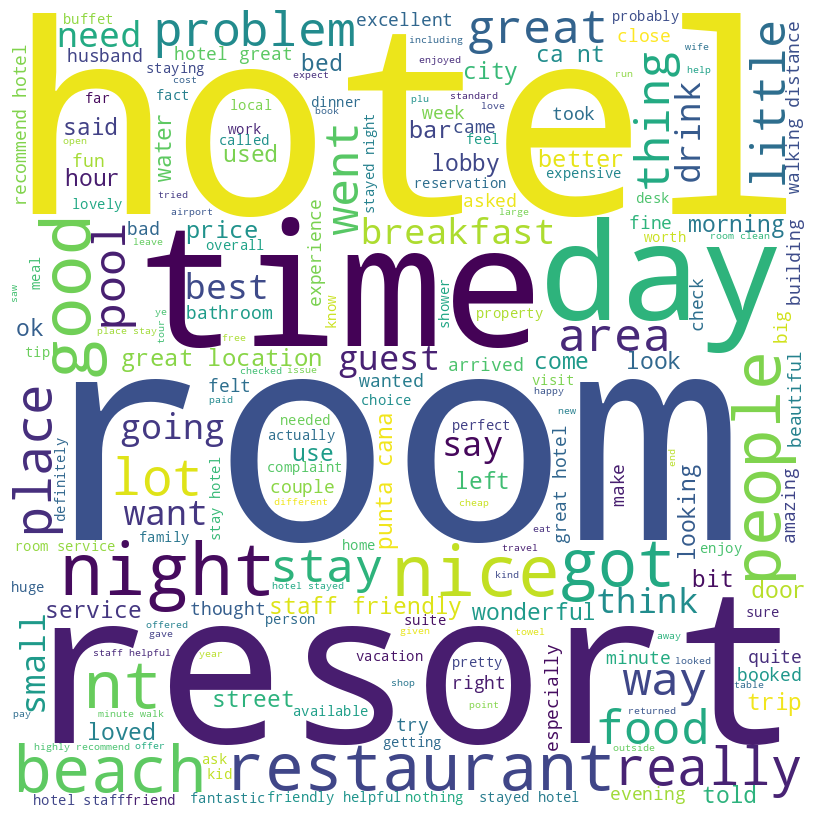

In [37]:
text = ' '.join(df['Review'])
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig("wordcloud.png")
plt.show()

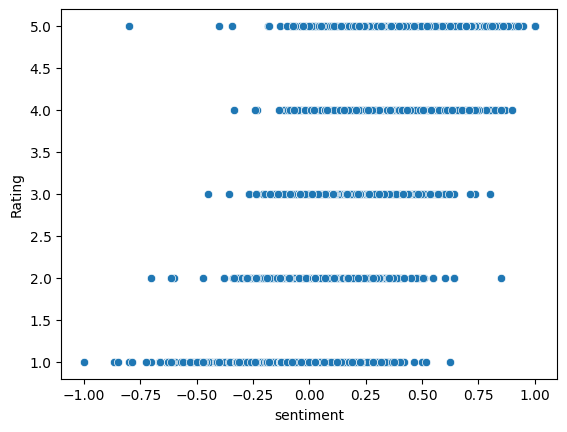

In [38]:
sns.scatterplot(data=df, x='sentiment', y='Rating')
plt.savefig("scatterplot.png")
plt.show()

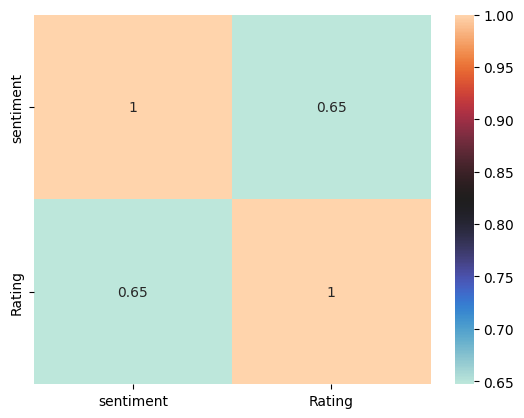

In [39]:
sns.heatmap(df[['sentiment', 'Rating']].corr(), annot=True, cmap='icefire')
plt.savefig("correlationheatmap.png")
plt.show()